# Machine Learning Model Building

In [2]:
# Load libraries
import pandas
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
url = "dataset_cybersecurity_michelle.csv"
data = read_csv(url)
data.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

### Graphs

<Figure size 1152x720 with 0 Axes>

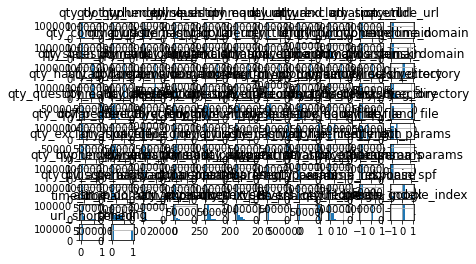

In [38]:
plt.figure(figsize=(16, 10))
data.hist()
plt.show()

                      qty_dot_url  qty_hyphen_url  qty_underline_url  \
qty_dot_url              1.000000        0.107600           0.126028   
qty_hyphen_url           0.107600        1.000000           0.215302   
qty_underline_url        0.126028        0.215302           1.000000   
qty_slash_url            0.242210        0.295733           0.239987   
qty_questionmark_url     0.405045        0.059986           0.069116   
...                           ...             ...                ...   
qty_redirects           -0.050434        0.004012          -0.013307   
url_google_index        -0.005120       -0.003107          -0.002160   
domain_google_index     -0.003077        0.009954           0.003320   
url_shortened           -0.061796       -0.012898          -0.014459   
phishing                 0.163043        0.184028           0.181386   

                      qty_slash_url  qty_questionmark_url  qty_equal_url  \
qty_dot_url                0.242210              0.405045  

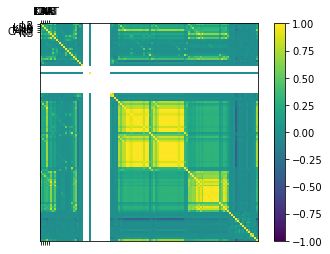

In [43]:
# plot correlation matrix
correlations = data[data.columns].corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [44]:
# Scatterplot Matrix
scatter_matrix(data)
plt.show()

In [ ]:
# Box Plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

scaled_data = pandas.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0.000000,0.000000,0.000000,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12,0.1,0.25,0.000484,0.0,0.000000,0.5,0.5,0.0,1.0
1,0.043478,0.142857,0.190476,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12,0.2,0.10,0.000088,0.0,0.111111,0.5,0.5,0.0,1.0
2,0.043478,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12,0.1,0.00,0.000494,1.0,0.111111,0.5,0.5,0.0,0.0
3,0.000000,0.028571,0.000000,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.1,0.25,0.002965,0.0,0.055556,0.5,0.5,0.0,1.0
4,0.043478,0.028571,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.1,0.05,0.000496,1.0,0.111111,0.5,0.5,0.0,0.0


### Making a model and testing accuracy (classification)

In [12]:
# Split-out validation dataset
array = scaled_data.values
X = array[:,0:111]
y = array[:,111]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [13]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9194680030840401
[[14274  1299]
 [  790  9577]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     15573
         1.0       0.88      0.92      0.90     10367

    accuracy                           0.92     25940
   macro avg       0.91      0.92      0.92     25940
weighted avg       0.92      0.92      0.92     25940



In [25]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
result = []
names = []
for name, model in models:
 pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=30)),
        ('model', model)
    ])
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 result.append([name, cv_results.mean()])
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

LR: 0.864618 (0.002439)


c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

LDA: 0.843308 (0.003672)


c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

KNN: 0.849612 (0.015256)


c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

CART: 0.867143 (0.002164)


c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

NB: 0.842229 (0.003862)


In [ ]:
import seaborn as sns

results_df = pandas.DataFrame(result)

print(results_df)
# Plotting the results
plt.figure(figsize=(14, 8))
sns.barplot(data=results_df.melt(id_vars=0), x='variable', y='value', hue=0)
plt.title('Model Evaluation')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

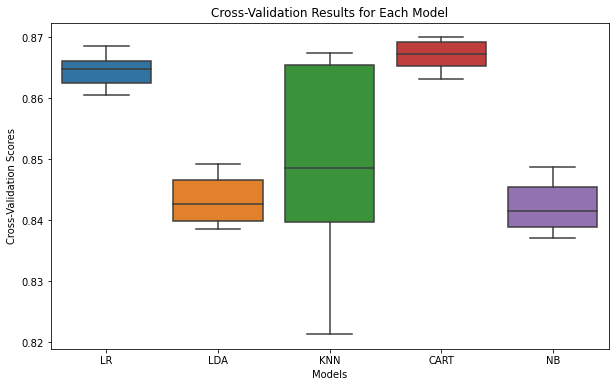

In [34]:
all_scores = [score for scores in results for score in scores]
all_labels = [name for name, scores in zip(names, results) for _ in scores]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_labels, y=all_scores)

# Customize the plot
plt.title('Cross-Validation Results for Each Model')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Scores')

plt.show()

### Feature selection

In [22]:
k_best =30  
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_validation)

# build model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, Y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(Y_validation, y_pred)
print(f"Accuracy: {accuracy}")

c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 0.8670393215111797


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Create a pipeline that does feature selection and model training
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Set up a parameter grid to search for the best 'k' (number of features)
param_grid = {'select__k': range(10, 31)}  # Testing k values from 10 to 30

# Use cross-validation to find the best value for 'k'
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best value for k and the best score
print(f"Best k: {grid_search.best_params_['select__k']}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32 33 34 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\21AhmedU\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [22 23 24 26 27 28 29 30 31 32

Best k: 30
Best cross-validated accuracy: 0.8672
